In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

from patsy import dmatrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [6]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df.dropna(inplace = True)
df['horsepower'] = df['horsepower'].astype(int)


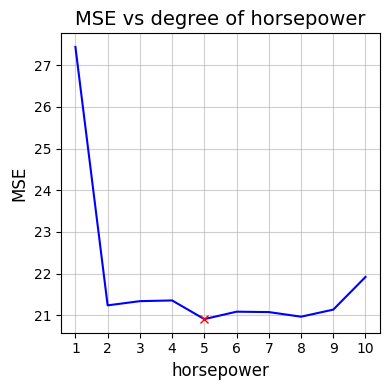

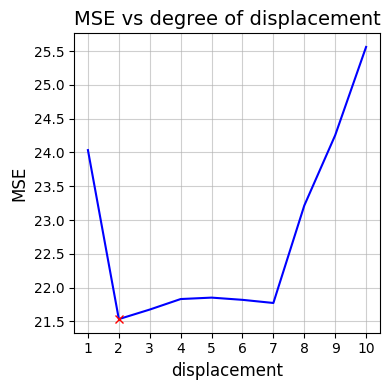

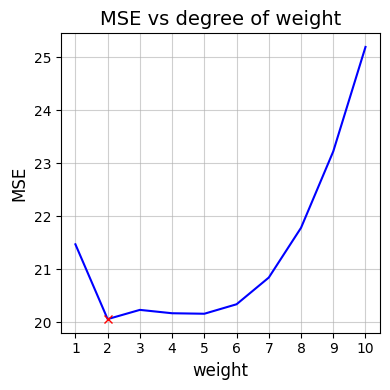

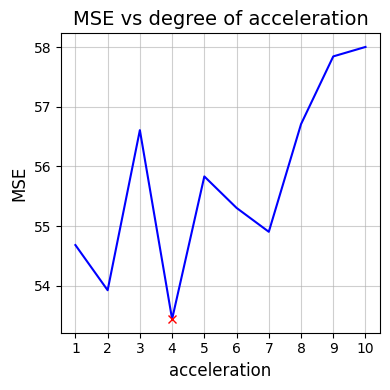

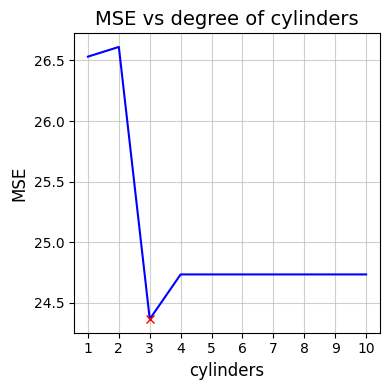

In [7]:
poly_columns = ['horsepower', 'displacement', 'weight', 'acceleration', 'cylinders']
power = 10
y = df['mpg']
for col in poly_columns:
    scores = {}
    X = df[col]
    for N in range(1, power + 1):
        poly = PolynomialFeatures(degree = N)
        X_poly = poly.fit_transform(X.to_frame())
        lr = LinearRegression()
        scores[N] = (-np.mean(cross_val_score(lr,
                                            X_poly,
                                            y,
                                            scoring = 'neg_mean_squared_error',
                                            cv = 10)))
    min_degree = min(scores, key = scores.get)
    min_score = scores[min_degree]
    plt.figure(figsize=(4,4))
    plt.plot(range(1, power + 1), scores.values(), color = 'blue')
    plt.plot(min_degree, min_score, marker = 'x', color = 'red')
    plt.xlabel(f'{col}', fontsize = 12)
    plt.xticks(ticks=range(1, power + 1))
    plt.ylabel('MSE',  fontsize = 12)
    plt.title(f'MSE vs degree of {col}',  fontsize = 14)
    plt.grid(alpha = 0.6)
    plt.tight_layout()
    plt.show()





In [13]:
df = pd.read_csv('/content/drive/MyDrive/An introduction to statistical analysis/data/Boston.csv')
df = df.iloc[:, 1:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


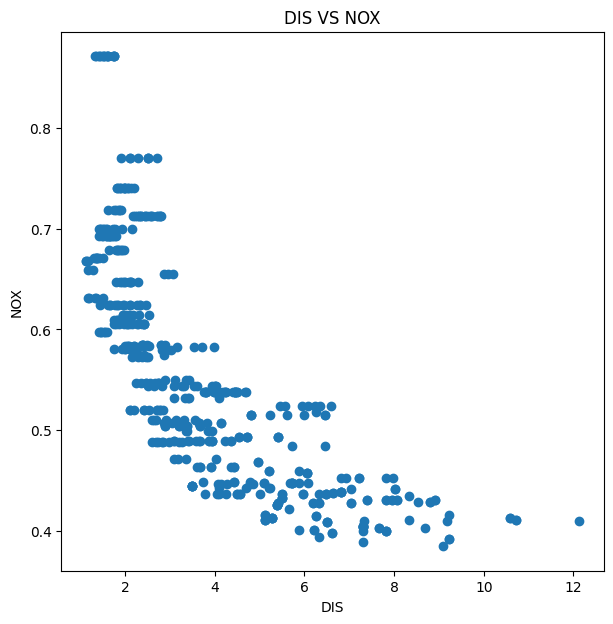

In [18]:
X = df['DIS']
y = df['NOX']

plt.figure(figsize = (7,7))
plt.scatter(X, y)
plt.title('DIS VS NOX')
plt.xlabel('DIS')
plt.ylabel('NOX')
plt.show()

In [35]:
poly = PolynomialFeatures(3, include_bias = False)
X_poly = poly.fit_transform(X.to_frame())

model = sm.OLS(y, sm.add_constant(X_poly)).fit() #¿What happens if you add a constant & why?
print(model.summary())
mse = mean_squared_error(y, model.predict(sm.add_constant(X_poly)))
print(f'{"="*100}')
print(f'The mean squared error is {mse:.5f}')
print(f'{"="*100}')

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          2.71e-136
Time:                        03:03:49   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9341      0.021     45.110      0.0

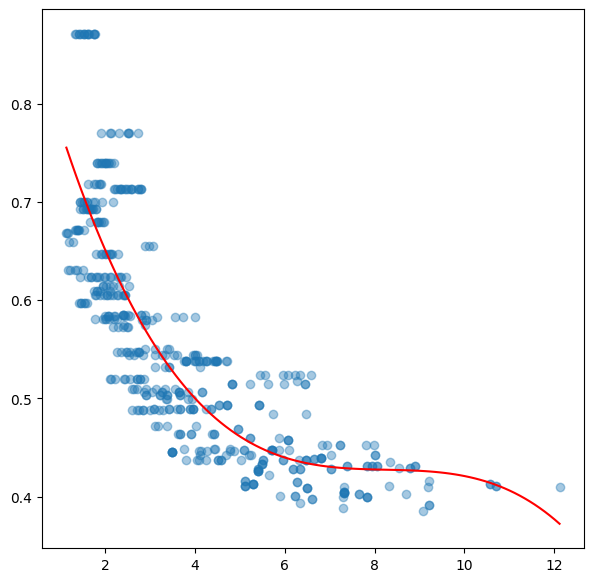

In [36]:
X_test = np.linspace(min(X), max(X), 100)
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
pred_test = model.predict(sm.add_constant(X_test_poly))

plt.figure(figsize = (7,7))
plt.scatter(X, y, alpha = 0.4)
plt.plot(X_test, pred_test, color = 'red')

# Residuals Sums Per degree

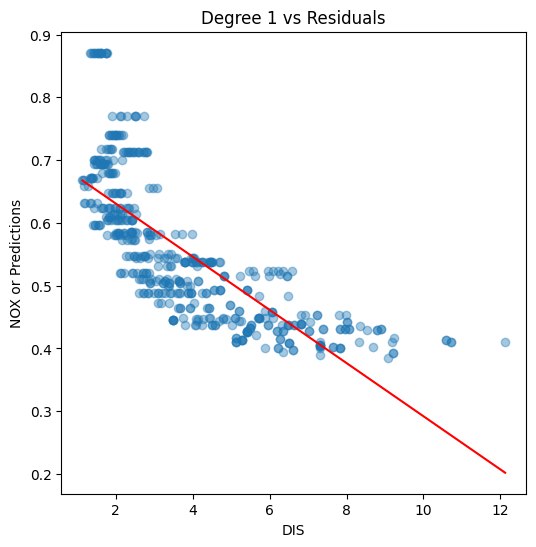

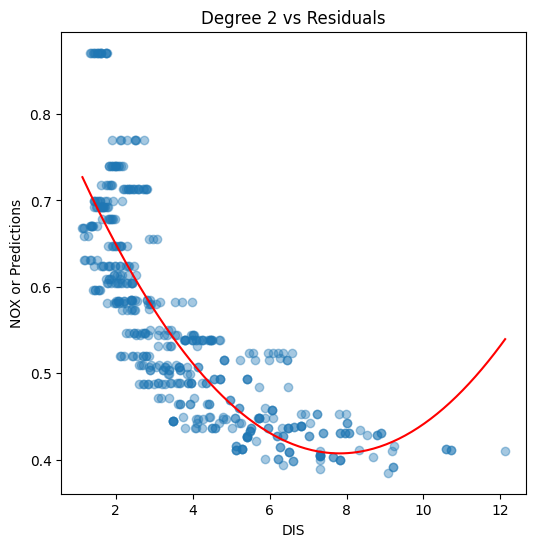

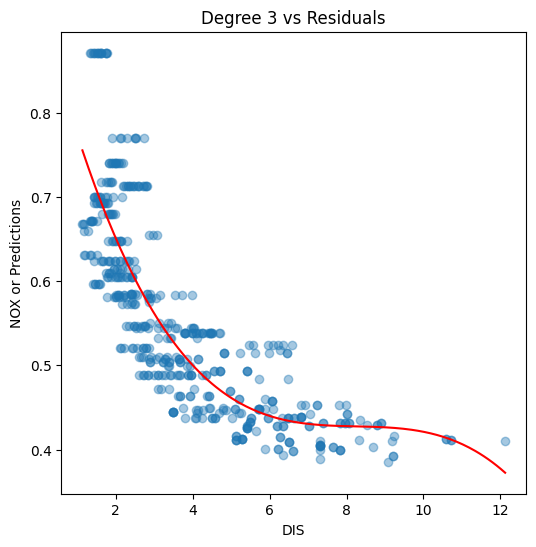

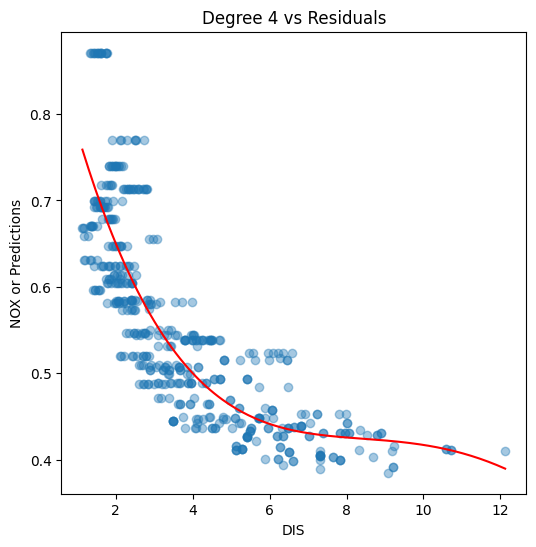

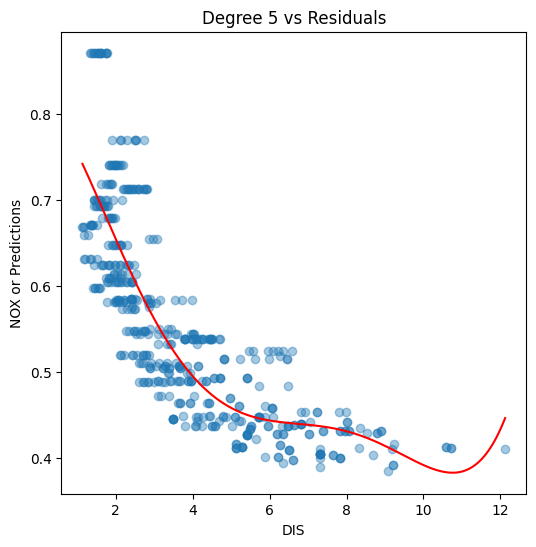

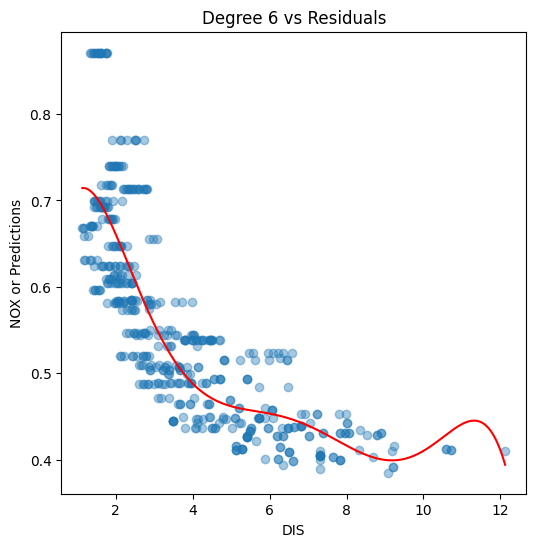

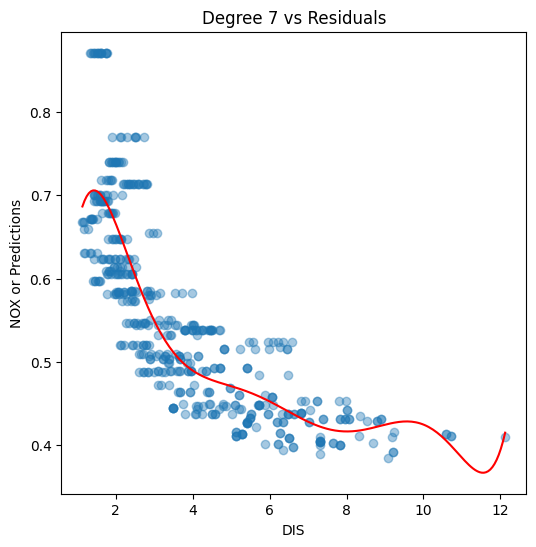

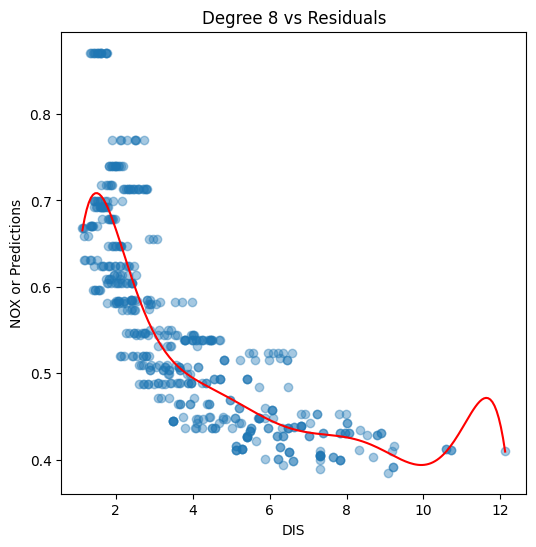

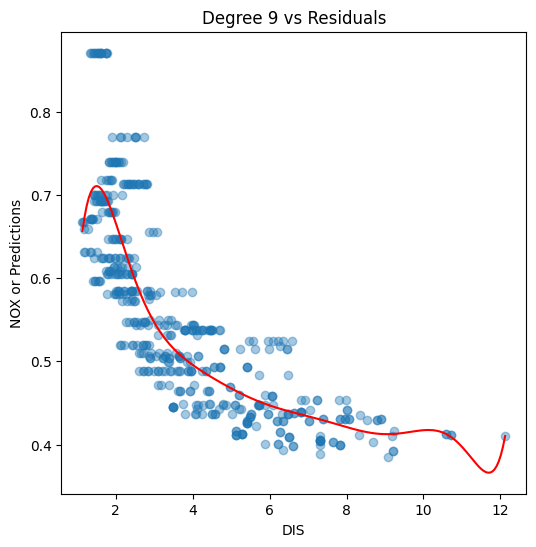

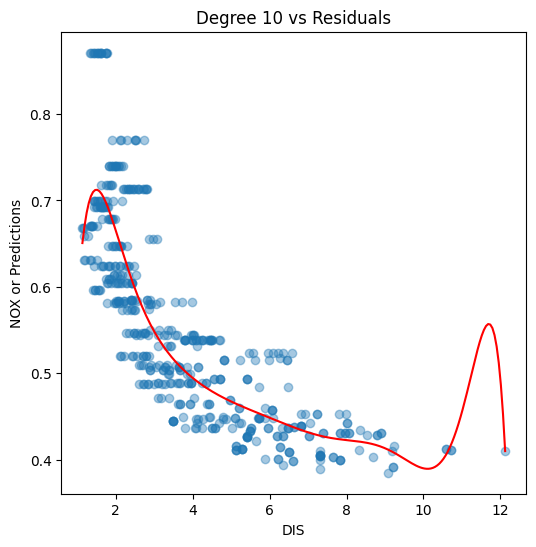

In [51]:
residual_score = {}

for p in range(1, 11):
    poly = PolynomialFeatures(degree=p, include_bias=False)
    X_poly = poly.fit_transform(X.to_frame())
    X_poly = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly).fit()

    model_pred = model.predict(X_poly)
    residual_score[p] = np.sum(np.square(y - model_pred))
    X_test = np.linspace(min(X), max(X), 200)
    X_test_poly = poly.transform(X_test.reshape(-1,1))
    preds_test = model.predict(sm.add_constant(X_test_poly))

    plt.figure(figsize = (6,6))
    plt.title(f'Degree {p} vs Residuals')
    plt.scatter(X, y, alpha = 0.4)
    plt.plot(X_test, preds_test, color = 'red')
    plt.xlabel('DIS')
    plt.ylabel('NOX or Predictions')
    plt.show()


We can see the bigger the polynomial gets, the wigglier the tail and their confidence intervals are wider.

So this tell us that polynomials are really bad to extrapolate data, so higher polynomial are less likely to generalize well to unseen data.

In [44]:
scores = pd.DataFrame(residual_score, index=['RSS']).T
scores = scores.sort_values(by = 'RSS', ascending = False)
scores

,RSS
1,2.768563
2,2.035262
3,1.934107
4,1.932981
5,1.915290
6,1.878257
7,1.849484
8,1.835630
9,1.833331
10,1.832171


Validation: In order to be clear, which degree results in the lower SSR we will apply Crossval

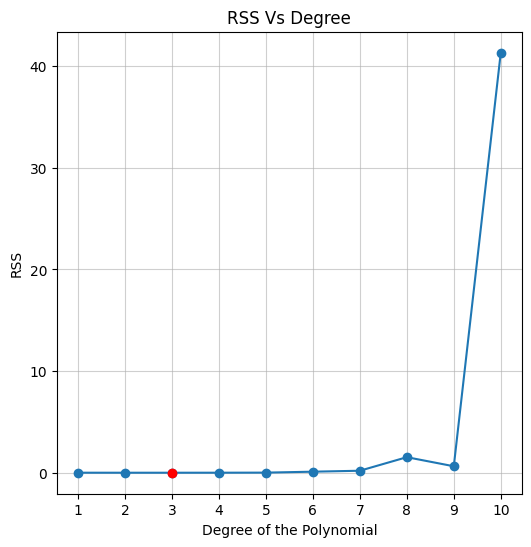

In [50]:
scores = {}
power = 10
for p in range(1, power + 1):
    poly = PolynomialFeatures(degree = p, include_bias = False)
    X_poly = poly.fit_transform(X.to_frame())
    lr = LinearRegression()
    scores[p] = np.mean(-cross_val_score(lr, X_poly, y, cv = 10, scoring = 'neg_mean_squared_error'))

min_degree = min(scores, key = scores.get)
min_score = scores[min_degree]

plt.figure(figsize = (6,6))
plt.plot(range(1, power + 1), scores.values(), marker = 'o')
plt.plot(min_degree, min_score, marker = 'o', color = 'red')
plt.title('RSS Vs Degree')
plt.xlabel('Degree of the Polynomial')
plt.xticks(ticks = range(1, power + 1))
plt.ylabel('RSS')
plt.grid(alpha = 0.6)
plt.show()



# Using a spline on the regression

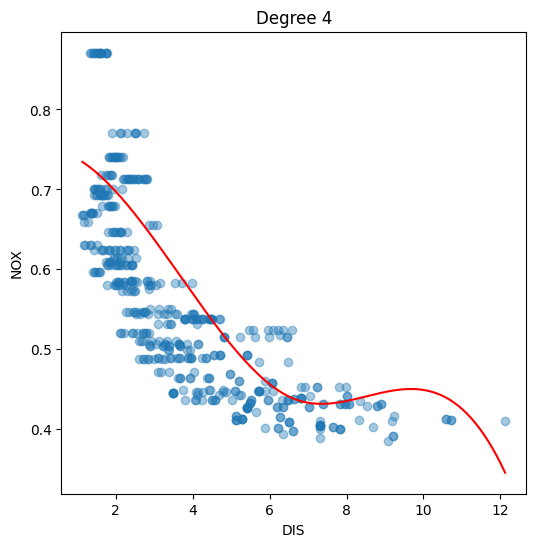

In [55]:
X_transformed = dmatrix('bs(DIS, df=4)', data = {'DIS': X}, return_type = 'dataframe')
model = sm.OLS(y, sm.add_constant(X_transformed)).fit()

X_test = np.linspace(min(X), max(X), 200)
X_test_transf = dmatrix('bs(DIS, df=4)', data = {'DIS': X_test}, return_type = 'dataframe')

model_preds = model.predict(sm.add_constant(X_test_transf))
plt.figure(figsize = (6,6))
plt.title(f'Degree 4')
plt.scatter(X, y, alpha = 0.4)
plt.plot(X_test, model_preds, color = 'red')
plt.xlabel('DIS')
plt.ylabel('NOX')
plt.show()



Whats the best df of the spline?

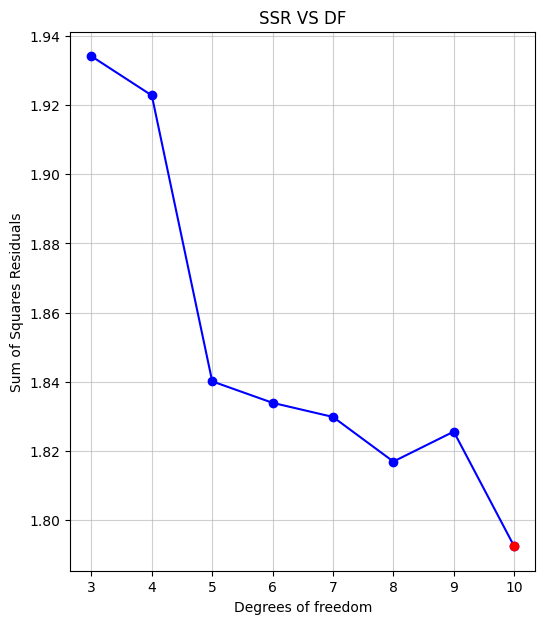

In [63]:
degrees_of_freedom = 10
score = {}
for df in range(3, degrees_of_freedom + 1):
    X_transf = dmatrix(f'bs(DIS, df = {df})', data = {'DIS': X}, return_type = 'dataframe')
    model = LinearRegression().fit(X_transf, y)
    model_preds = model.predict(X_transf)
    score[df] = np.sum(np.square(y - model_preds))
    #add plot for the fitted line

min_degree = min(score, key = score.get)
min_ssr = score[min_degree]

plt.figure(figsize = (6,7))
plt.plot(range(3,degrees_of_freedom + 1), score.values(), marker = 'o', color = 'blue')
plt.plot(min_degree, min_ssr, marker = 'o', color = 'red')
plt.xlabel('Degrees of freedom')
plt.ylabel('Sum of Squares Residuals')
plt.title('SSR VS DF')
plt.xticks(ticks = range(3, degrees_of_freedom + 1))
plt.grid(alpha = 0.6)
plt.show()



Is this really true? What about the results when applying CV = 10?

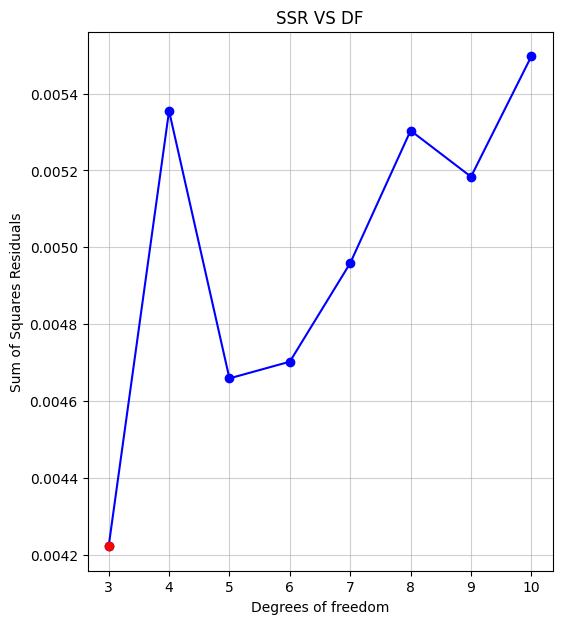

In [65]:
score = {}
for df in range(3, degrees_of_freedom + 1):
    X_transf = dmatrix(f'bs(DIS, df = {df})', data = {'DIS': X}, return_type = 'dataframe')
    model = LinearRegression()
    score[df] = (-np.mean(cross_val_score(model, X_transf, y, cv = 10, scoring = 'neg_mean_squared_error')))

min_degree = min(score, key = score.get)
min_ssr = score[min_degree]

plt.figure(figsize = (6, 7))
plt.plot(range(3, degrees_of_freedom + 1), score.values(), marker = 'o', color = 'blue')
plt.plot(min_degree, min_ssr, marker = 'o', color = 'red')
plt.xlabel('Degrees of freedom')
plt.ylabel('Sum of Squares Residuals')
plt.title('SSR VS DF')
plt.xticks(ticks = range(3, degrees_of_freedom + 1))
plt.grid(alpha = 0.6)
plt.show()